In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as pltx
import sklearn.linear_model as skl


In [2]:
df=pd.read_csv("data.csv")
df.head(10)

,Unnamed: 0,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
0,0,Brazil,South America,768.678.382,"3.668,531",10.226.205,"75.167,5"
1,1,India,Asia,348.448.000,260721,4.950.000,"70.393,5"
2,2,China,Asia,123.059.739,88287,1.675.215,"73.459,1"
3,3,Thailand,Asia,87.468.496,"1.264,303",1.336.575,"65.442,2"
4,4,Pakistan,Asia,65.450.704,324219,1.130.820,57.879
5,5,Mexico,North America,56.446.821,452524,781.054,72.27
6,6,Colombia,South America,36.951.213,740075,416.626,"88.691,5"
7,7,Australia,Oceania,34.403.004,"1.373,406",447.204,"76.929,1"
8,8,Guatemala,North America,33.533.403,"1.938,114",259.85,"129.049,3"
9,9,United States of America,North America,29.926.210,91304,370.53,80.766


In [3]:
df['Production (Tons)'].describe()
# shown as a categorical val but is numerical ... converting to numeric type
# the type of all the numerical columns are object type therefore need to be converted

count             103
unique            103
top       768.678.382
freq                1
Name: Production (Tons), dtype: object

## PREPROCESSING

In [4]:
# Removing '.' and converting ',' to '.' for all the columns
# Converting them to int or float type as required by the problem 
df["Production (Tons)"] = (
    df["Production (Tons)"]
    .astype(str)
    .str.replace(r"\.", "", regex=True)
    .astype("int64")
    
)
df["Production per Person (Kg)"]=(
    df["Production per Person (Kg)"].astype(str)
    .str.replace(r"\.","",regex=True)
    .str.replace(r"\,",".",regex=True)
    .astype("float64")
)
df["Acreage (Hectare)"]=(
    df["Acreage (Hectare)"].astype(str)
    .str.replace(r"\.","",regex=True)
    .str.replace(r"\,",".",regex=True)
    .astype("float32")
)
df["Yield (Kg / Hectare)"]=(
    df["Yield (Kg / Hectare)"].astype(str)
    .str.replace(r"\.","",regex=True)
    .str.replace(r"\,",".",regex=True)
    .astype("float32")
)


In [5]:
#Not contributing to learning thereby removing it
del df["Unnamed: 0"]


In [6]:
#Checking for null and missing values
df.isna().sum()

Country                       0
Continent                     0
Production (Tons)             0
Production per Person (Kg)    0
Acreage (Hectare)             1
Yield (Kg / Hectare)          1
dtype: int64

In [7]:
# Above loc shows that the count of null value is one in the "Acreage (Hectare)" column and "Yield (Kg / Hectare)"
# Finding out the row with null value for "Acreage (Hectare)"
df[df["Acreage (Hectare)"].isnull()==True]

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,Djibouti,Africa,53,51.0,NaN,NaN


In [8]:
# Finding out the row with null value for "Yield (Kg / Hectare)"
df[df["Yield (Kg / Hectare)"].isnull()==True]

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
99,Djibouti,Africa,53,51.0,NaN,NaN


In [9]:
# Dropping the row and resetting the index
# A new index column gets created after reset index , Dropping it
df.dropna(axis=0,inplace=True)
df.reset_index(inplace=True)
df.drop(columns=["index"],inplace=True)

In [10]:
#No null values left 
df.tail(10)

,Country,Continent,Production (Tons),Production per Person (Kg),Acreage (Hectare),Yield (Kg / Hectare)
92,Portugal,Europe,5429,528.0,62.0,88274.398438
93,Antigua and Barbuda,North America,5365,6217.0,83.0,64638.601562
94,Dominica,North America,4855,68099.0,244.0,19914.400391
95,Oman,Asia,1186,237.0,51.0,23432.199219
96,Yemen,Asia,500,17.0,50.0,10.000000
97,Spain,Europe,394,8.0,9.0,43596.500000
98,Lebanon,Asia,97,16.0,3.0,28386.400391
99,Singapore,Asia,50,9.0,2.0,25.000000
100,Samoa,Oceania,12,6.0,1.0,11949.799805
101,Syria,Asia,1,0.0,0.0,83034.203125


## Univariate Analysis 


In [11]:
# Country Column Analysis 
df["Country"].describe()

count        102
unique       102
top       Brazil
freq           1
Name: Country, dtype: object

This tells us that we are analysing 102 country columns where all 102 values are of differet countries and no duplicates are present

In [12]:
# Just to double check 
df["Country"].duplicated().sum()

0

In [13]:
#Continent column Analysis
df["Continent"].describe()

count        102
unique         6
top       Africa
freq          38
Name: Continent, dtype: object

In [14]:
df["Continent"].value_counts()
# The amount of countries data present under each continent is different (Analysing Distribution)

Continent
Africa           38
Asia             25
North America    22
South America    11
Oceania           4
Europe            2
Name: count, dtype: int64

In [15]:
pd.options.display.float_format = '{:.0f}'.format
df["Production (Tons)"].describe()

count         102
mean     18503719
std      84191487
min             1
25%         62519
50%       1440044
75%       6426824
max     768678382
Name: Production (Tons), dtype: float64

So the describe function tells how much varied the data is . The data is highly right skewed .The difference between 0.75 quantile and max is also high . The number of outliers are high . Thereby making the distribution highly skewed

In [16]:
df["Production per Person (Kg)"].describe()

count      102
mean    112952
std     176651
min          0
25%       3672
50%      25572
75%     146385
max     951087
Name: Production per Person (Kg), dtype: float64

So the describe function tells how much varied the data is . The data is highly right skewed .The difference between 0.75 quantile and max is also high . The number of outliers are high . Thereby making the distribution highly skewed

In [17]:
df["Acreage (Hectare)"].describe()

count        102
mean      249898
std      1137003
min            0
25%         1104
50%        16558
75%        80474
max     10226205
Name: Acreage (Hectare), dtype: float64

Here the standard deviation difference is much larger than supposed. Thereby telling us an unvariablity in data.

In [18]:
df["Yield (Kg / Hectare)"].describe()

count      102
mean     52628
std      30505
min         10
25%      29072
50%      54109
75%      73283
max     129049
Name: Yield (Kg / Hectare), dtype: float64

The less significant difference between mean and standard deviation tells us that the graph has much lesser variance than other graphs.

# GRAPHS

C:\Users\KUHU\AppData\Local\Temp\ipykernel_1968\3588341175.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


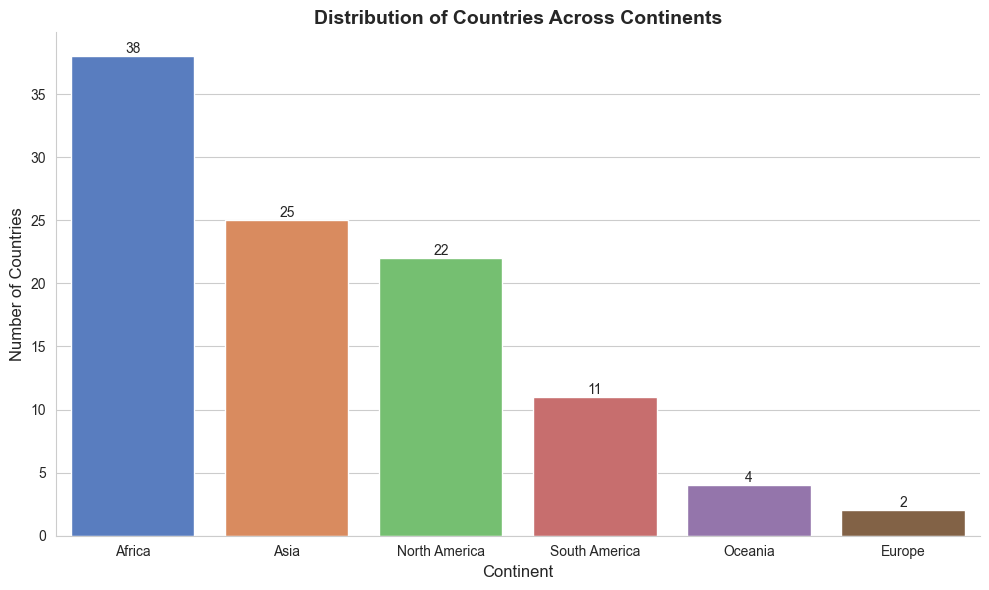

In [19]:
# Prepare data
continent_counts = df["Continent"].value_counts()

# Set style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(10, 6))

# Plot
ax = sns.barplot(
    x=continent_counts.index,
    y=continent_counts.values,
    palette="muted"
)

# Title and labels
ax.set_title("Distribution of Countries Across Continents", fontsize=14, fontweight="bold")
ax.set_xlabel("Continent", fontsize=12)
ax.set_ylabel("Number of Countries", fontsize=12)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height())}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

# Remove top and right spines for cleaner look
sns.despine()
plt.tight_layout()
plt.show()

The first graph tells us the continent to country wise bar graph.
Each continent vs the number of countries in that particular continent whose data is given to us.

C:\Users\KUHU\AppData\Local\Temp\ipykernel_1968\1017646246.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


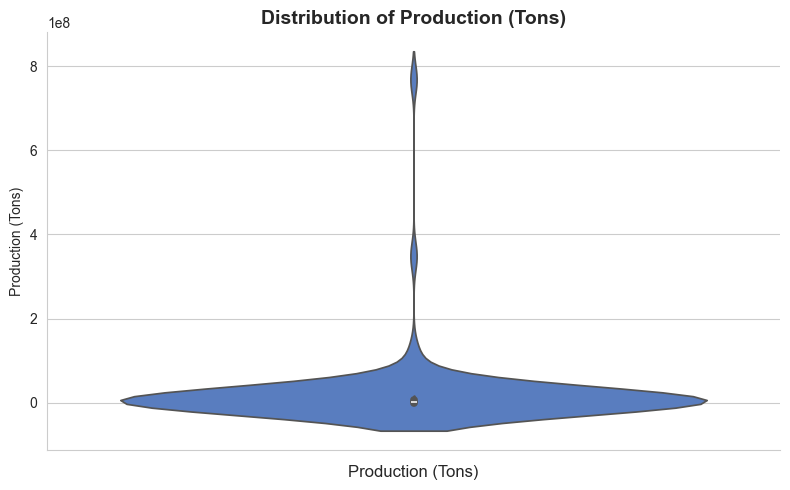

In [20]:

plt.figure(figsize=(8, 5))

# Violin plot
ax = sns.violinplot(
    data=df["Production (Tons)"],
    palette="muted",
    )

# Title and labels
ax.set_title("Distribution of Production (Tons)", fontsize=14, fontweight="bold")
ax.set_xlabel("Production (Tons)", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

This plot is a violin plot which tells us the distribution of values of Production (Tons).
This helps us to detect outliers in data set. And visualize how the values affect the real world data.

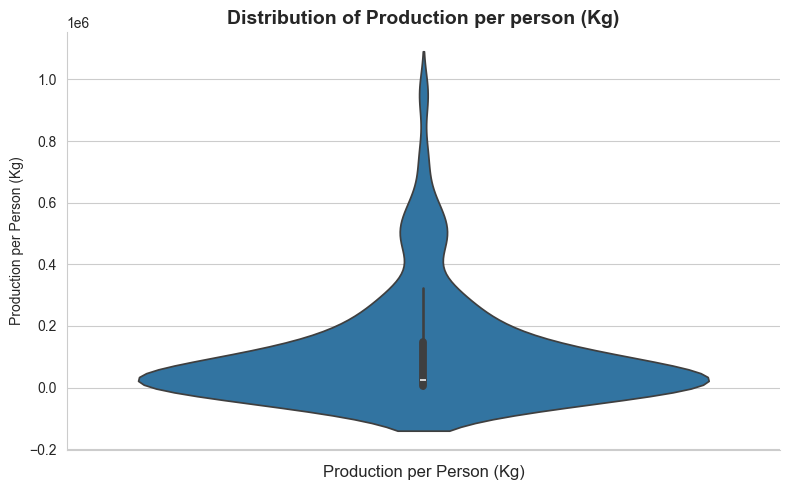

In [21]:
plt.figure(figsize=(8, 5))

# Violin plot
ax = sns.violinplot(
    data=df["Production per Person (Kg)"],
)

# Title and labels
ax.set_title("Distribution of Production per person (Kg)", fontsize=14, fontweight="bold")
ax.set_xlabel("Production per Person (Kg)", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

This plot is a violin plot which tells us the distribution of values of Production per Person (Kg).
This helps us to detect outliers in data set. And visualize how the values affect the real world data.

C:\Users\KUHU\AppData\Local\Temp\ipykernel_1968\1228579510.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


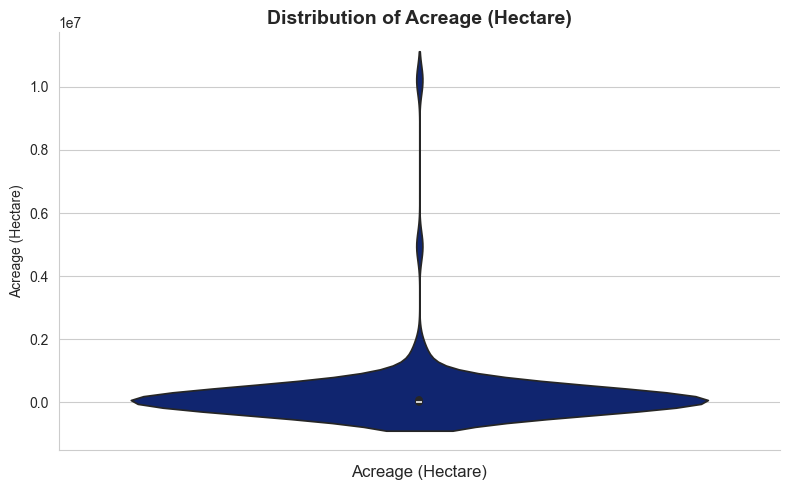

In [22]:
plt.figure(figsize=(8, 5))

# Violin plot
ax = sns.violinplot(
    data=df["Acreage (Hectare)"],
    palette="dark"
    )

# Title and labels
ax.set_title("Distribution of Acreage (Hectare)", fontsize=14, fontweight="bold")
ax.set_xlabel("Acreage (Hectare)", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

This plot is a violin plot which tells us the distribution of values of Distribution of Acreage (Hectare).
This helps us to detect outliers in data set. And visualize how the values affect the real world data.

C:\Users\KUHU\AppData\Local\Temp\ipykernel_1968\1938718076.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(


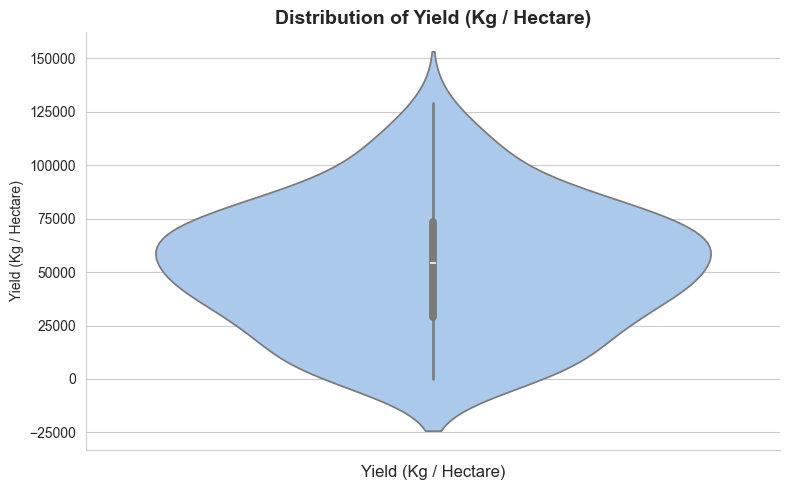

In [23]:
plt.figure(figsize=(8, 5))

# Violin plot
ax = sns.violinplot(
    data=df["Yield (Kg / Hectare)"],
    palette="pastel",
    )

# Title and labels
ax.set_title("Distribution of Yield (Kg / Hectare)", fontsize=14, fontweight="bold")
ax.set_xlabel("Yield (Kg / Hectare)", fontsize=12)
sns.despine()
plt.tight_layout()
plt.show()

This plot is a violin plot which tells us the distribution of values of Distribution of Yield (Kg / Hectare).
This helps us to detect outliers in data set. And visualize how the values affect the real world data.

C:\Users\KUHU\AppData\Local\Temp\ipykernel_1968\436769747.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


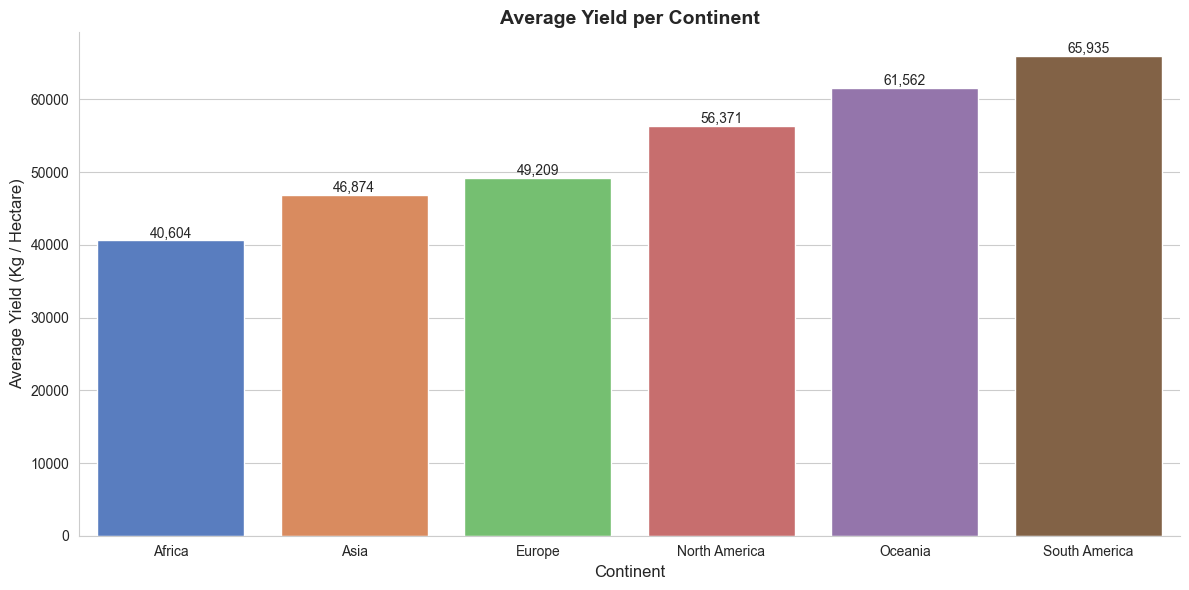

In [24]:
continent_yield =  df['Yield (Kg / Hectare)'].groupby(df['Continent']).mean()

# Set style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(12, 6))

# Plot
ax = sns.barplot(
    x=continent_yield.index,
    y=continent_yield.values,
    palette="muted",hue_order=continent_yield.values.sort()
)

# Title and labels
ax.set_title("Average Yield per Continent", fontsize=14, fontweight="bold")
ax.set_xlabel("Continent", fontsize=12)
ax.set_ylabel("Average Yield (Kg / Hectare)", fontsize=12)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height()):,}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

# Remove top and right spines for cleaner look
sns.despine()
plt.tight_layout()
plt.show()

This a bar chart of continents vs yield which literary shows the yield average of continents describing productivity of continents. The most productive continent being South America

C:\Users\KUHU\AppData\Local\Temp\ipykernel_1968\3284145423.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(


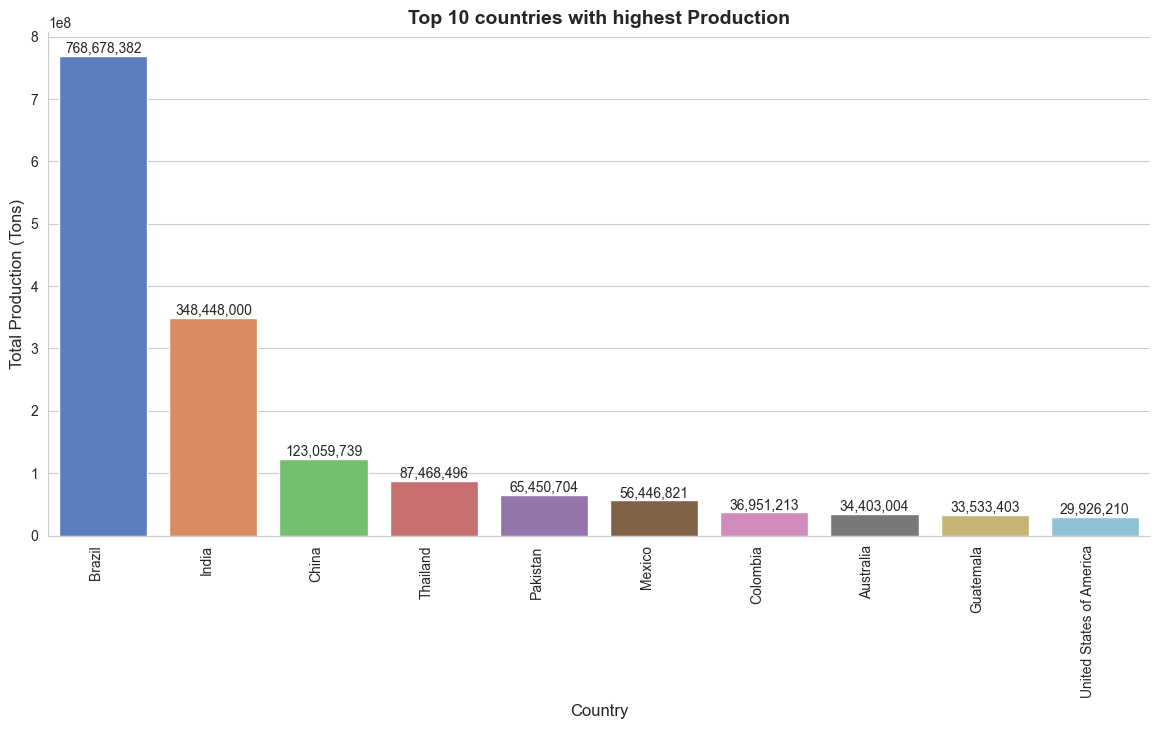

In [25]:
top_10_production_countries =  df['Production (Tons)'].groupby(df['Country']).sum().sort_values(ascending=False)[:10]

# Set style
sns.set_style("whitegrid")

# Create figure
plt.figure(figsize=(12, 6))

# Plot
ax = sns.barplot(
    x=top_10_production_countries.index,
    y=top_10_production_countries.values,
    palette="muted",hue_order=continent_yield.values.sort()
)

# Title and labels
ax.set_title("Top 10 countries with highest Production", fontsize=14, fontweight="bold")
ax.set_xlabel("Country", fontsize=12)
ax.set_ylabel("Total Production (Tons)", fontsize=12)

# Add value labels on bars
for p in ax.patches:
    ax.annotate(
        f"{int(p.get_height()):,}",
        (p.get_x() + p.get_width() / 2., p.get_height()),
        ha='center',
        va='bottom',
        fontsize=10
    )

# Remove top and right spines for cleaner look
sns.despine()
plt.tight_layout()
plt.xticks(rotation=90, ha='right',)
plt.show()

This plot tell us the top ten countries whose total production is the highest . Arranged in an ascending order this plot helps us to know the mass producers of sugarcane in the world

In [31]:
continent_counts = df['Continent'].value_counts()

continent_label_map = {
    continent: f"{continent} ({count})"
    for continent, count in continent_counts.items()
}


fig=pltx.scatter(
    df,
    x="Acreage (Hectare)",
    y='Production (Tons)',
    color="Continent",
    hover_name="Country",
    hover_data=['Continent',"Country",'Production (Tons)','Acreage (Hectare)'],
    log_x=True,
    log_y=True,
    title= "Acreage (Hectare) verses Production (Tons) basis of Continent",
    labels={"Continent": "Continent (Number of Countries)"}
    )

fig.for_each_trace(
    lambda t: t.update(name=continent_label_map[t.name])
)
fig.write_html("plots/production_vs_acreage.html")
fig.show()


This interactive scatter plot mmade with the help of plotly shows the linear relationship between production and acreage quantities. More the land , more is the production.

In [27]:
# Requirements needed to be specified

# !pip install statsmodels
# !pip install --upgrade nbformat



Text(0.5, 1.0, '\nCorrelation heatmap of numerical columns\n')

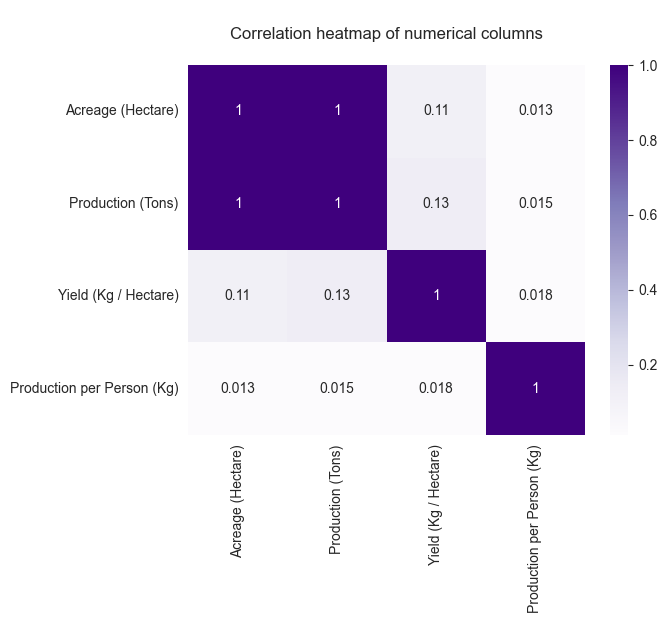

In [28]:
ax=sns.heatmap(df[['Acreage (Hectare)','Production (Tons)','Yield (Kg / Hectare)',"Production per Person (Kg)"]].corr(),
            annot=True,
            cmap='Purples',
            )
ax.set_title("\nCorrelation heatmap of numerical columns\n")

The correlation heat map of all the numerical values present in the data frame . This tells the most important correlation between Acreage and Production which is linear as we have already established in the scatter plot shown above.

In [32]:
continent_counts = df['Continent'].value_counts()

continent_label_map = {
    continent: f"{continent} ({count})"
    for continent, count in continent_counts.items()
}


fig=pltx.scatter(
    df,
    x="Yield (Kg / Hectare)",
    y='Production per Person (Kg)',
    color="Continent",
    hover_name="Country",
    hover_data=['Continent',"Country",'Production per Person (Kg)','Yield (Kg / Hectare)'],
    log_x=True,
    log_y=True,
    title= "Yield (Kg / Hectare) verses Production per Person (Kg) basis of Continent",
    labels={"Continent": "Continent (Number of Countries)"}
    )

fig.for_each_trace(
    lambda t: t.update(name=continent_label_map[t.name])
)
fig.write_html("plots/yield_vs_production_per_person.html")
fig.show()


A Scatter plot showing relationship between Production per Person and Yield of a Particular Country. The trend Line is mostly different for different continents . Thereby no particular relationship can be established.

In [33]:
# Prepare continent-wise production data
continent_production = (
    df.groupby("Continent", as_index=False)["Production (Tons)"]
      .sum()
)

# Create pie chart
fig = pltx.pie(
    continent_production,
    names="Continent",
    values="Production (Tons)",
    title="Total Sugarcane Production by Continent"
)


fig.write_html("plots/sugarcane_by_continent.html")
fig.show()


This is a pie chart which shows the overall division of production on the basis of different continents